<a href="https://colab.research.google.com/github/Madhuraaa22/PRODIGY_DS_02/blob/main/Prodigy_DS_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-02: Data Cleaning and EDA on Titanic Dataset**

Shape of the dataset: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      

/tmp/ipython-input-1190213493.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1190213493.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

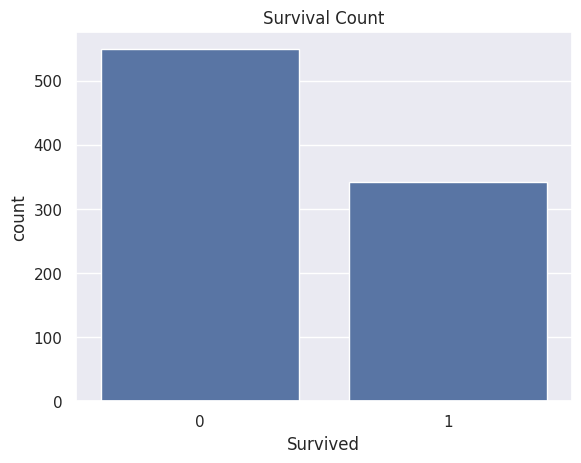

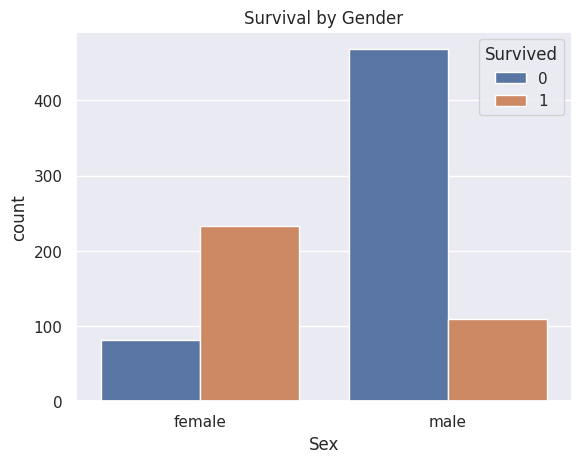

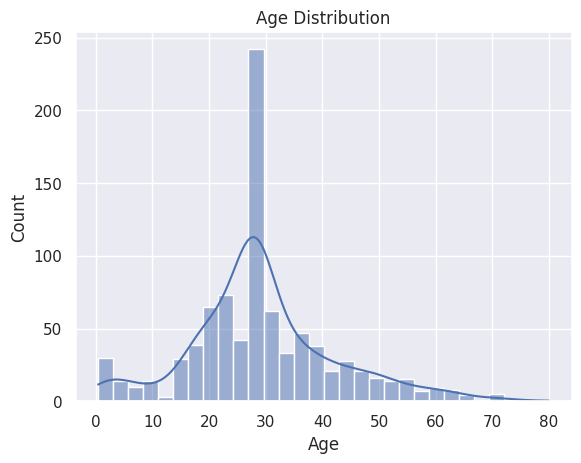

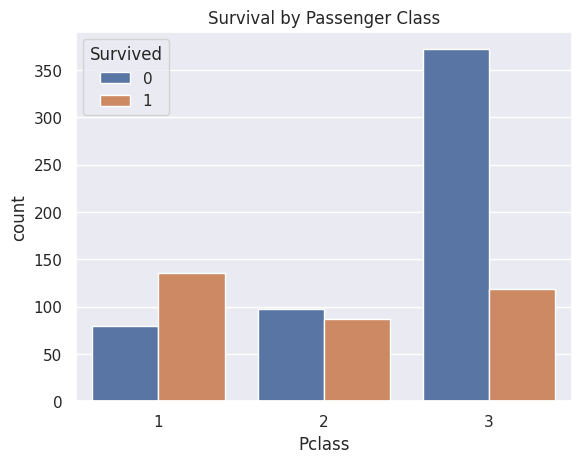

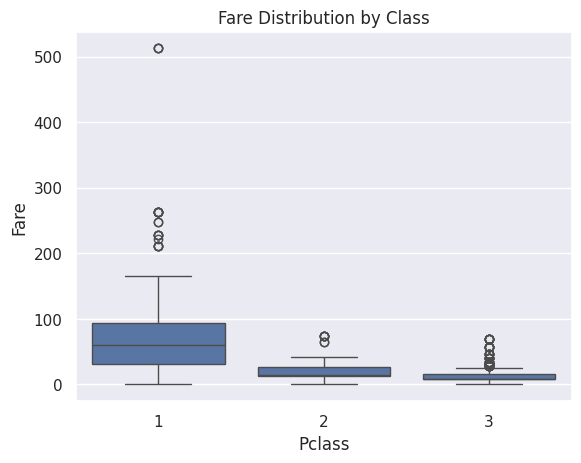

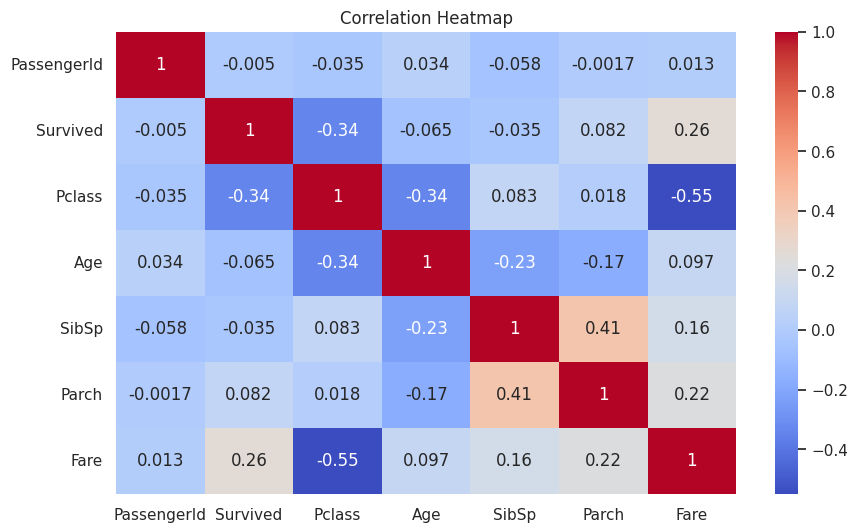


Key Insights:
- Women had higher survival rates than men.
- Passengers in 1st class had better survival chances.
- Younger passengers had a higher chance of survival.
- Fare shows moderate positive correlation with survival.


In [ ]:
# Step 1: Install necessary libraries (if not already installed)
!pip install seaborn --quiet

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Step 3: Load the dataset
df = pd.read_csv("/content/train.csv")

# Step 4: Display basic info
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Step 5: Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Step 6: Data Cleaning
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # too many missing values

# Convert categorical columns
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Step 7: Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# Step 8: EDA Visualizations

# 1. Survival Count
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

# 2. Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

# 3. Age Distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# 4. Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# 5. Fare Distribution by Class
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Fare Distribution by Class")
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 9: Key Insights
print("\nKey Insights:")
print("- Women had higher survival rates than men.")
print("- Passengers in 1st class had better survival chances.")
print("- Younger passengers had a higher chance of survival.")
print("- Fare shows moderate positive correlation with survival.")

# Step 10: Save cleaned data (optional)
df.to_csv("cleaned_titanic.csv", index=False)
